**Introductory**:

Investing in properties for Airbnb does not necessarily require large, luxurious spaces. Private and shared rooms are typically more cost-effective to manage than entire homes or apartments. This affordability allows investors to enter the market at a lower cost point, potentially increasing their return on investment (ROI) through higher occupancy rates and lower operational costs.

The market for shared economy and short-term rentals continues to expand globally. As regulations evolve and more travelers become accustomed to the concept of room-sharing and private room rentals, the potential for growth in this segment remains substantial. Early investment in this market segment positions investors to capitalize on this growth over the longer term.

**Business Background**:

As someone who wants to invest a property on Airbnb especially in private room and shared room types, how to increase profitable and attractive investments and find out how big the opportunity to invest in the Bangkok area and what best marketing strategies option to invest in either for private room or shared room types.

**Business Problem**:

To gain good marketing strategies for private and shared room types, therefore several questions need to be answer:
1. How do occupancy rates vary by room type in Bangkok (all room type)?
2. Which neighborhoods have the highest and lowest average occupancy rates for private/shared room types?
3. What are the optimal price ranges to maximize occupancy rates?
4. Which neighborhoods should be prioritized for rental property investment, based on a balance of affordability, demand, and occupancy potential?
5. Which are the top neighborhoods with the highest rental income potential, considering the current occupancy rates and listing availability?

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# import datetime

## Data Wrangling

###  Gathering Data

In [3]:
# import the dataset
df = pd.read_csv('Airbnb Listings Bangkok.csv')

In [4]:
# show tables
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


### Assesing Data

In [5]:
display(df.info(),df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

None

(15854, 17)

There are data type error for the price & last_review columns.

In [6]:
df.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [7]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

- There are 8 missing values ​​in the name column.
- There are 1 missing values ​​in the host_name column.
- There are 5790 missing values ​​in the last_review column.
- There are 5790 missing values ​​in the reviews_per_month column.

In [70]:
pd.DataFrame(df.isna().sum()/df.shape[0]*100,columns=['null_percentage']).query('null_percentage>0')

,null_percentage
name,0.050460
host_name,0.006308
last_review,36.520752
reviews_per_month,36.520752


for 'name' and 'host_name' columns are below 5% missing values, so values are safe to delete.

In [8]:
# Look for missing values in 'name' column
df.loc[df['name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
439,439,4549768,NaN,18852579,Titawan,Phra Khanong,13.69406,100.59619,Private room,1080,5,0,NaN,NaN,1,365,0
544,544,4720818,NaN,24386225,Cherry,Din Daeng,13.77562,100.57346,Private room,1200,1,0,NaN,NaN,1,365,0
572,572,4245018,NaN,22030043,Parichart,Bang Phlat,13.78376,100.49821,Private room,1200,1,0,NaN,NaN,1,365,0
669,669,6148415,NaN,31895202,Chira,Bang Na,13.68276,100.60894,Entire home/apt,2424,2,0,NaN,NaN,1,365,0
1030,1030,8055144,NaN,42521288,Nantida,Vadhana,13.74126,100.55761,Private room,5000,3,0,NaN,NaN,1,365,0
1282,1282,10000742,NaN,51374914,Diamond Bangkok,Ratchathewi,13.75328,100.52928,Private room,930,1,6,2017-05-13,0.07,1,365,0
1594,1594,10710165,NaN,55347997,Khaneungnit,Vadhana,13.71757,100.60464,Private room,1000,1,0,NaN,NaN,1,365,0
2075,2075,13142743,NaN,73275200,Pakaphol,Khlong Toei,13.72566,100.56416,Private room,850,1,2,2017-12-11,0.03,3,220,0


In [9]:
# Look for missing values in 'host_name' column
df.loc[df['host_name'].isna()]

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
3571,3571,19682464,Cozy Hideaway,137488762,NaN,Bang Kapi,13.76999,100.63769,Private room,1399,3,1,2017-07-29,0.02,1,365,0


In [11]:
df.duplicated().sum()

0

There are no duplicate data.

### Cleaning Data

In [12]:
# Data wrangling to clean and prepare the dataset for analysis

# Dropping unnecessary columns
columns_to_drop = ['Unnamed: 0','last_review']
cleaned_data = df.drop(columns=columns_to_drop)

In [13]:
# Handling missing values
# Filling NaN values in reviews_per_month  with 0
cleaned_data['reviews_per_month'].fillna(0, inplace=True)


In [14]:
# Dropping rows with missing values in essential columns like name, host_name, neighbourhood, and room_type
cleaned_data.dropna(subset=['name', 'host_name'], inplace=True)

In [15]:
cleaned_data.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [16]:
# Converting data types
cleaned_data['price'] = cleaned_data['price'].astype(float)

## EDA(Exploratory Data Analysis)


In [17]:
# Estimate occupancy rate based on availability (assuming 365 days in a year)
cleaned_data['occupancy_rate'] = 1 - (cleaned_data['availability_365'] / 365)

### 1. How do occupancy rates vary by room type in Bangkok (all room type)?

In [18]:
# Calculate average occupancy rate by room type
average_occupancy_by_room_type = cleaned_data.groupby('room_type')['occupancy_rate'].mean().reset_index()

# Display results
print("Average Occupancy Rates by Room Type:")
average_occupancy_by_room_type

Average Occupancy Rates by Room Type:


,room_type,occupancy_rate
0,Entire home/apt,0.382833
1,Hotel room,0.279051
2,Private room,0.262135
3,Shared room,0.259871


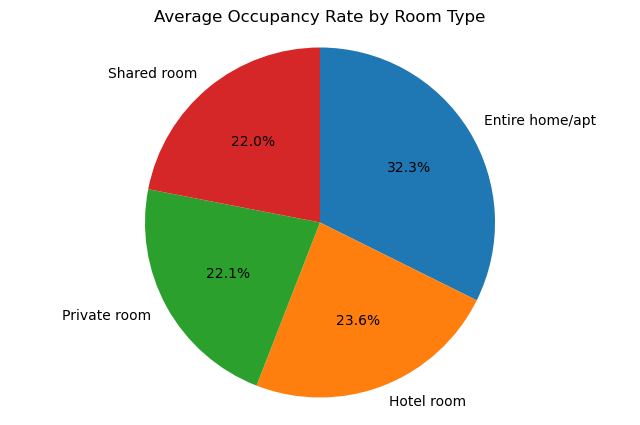

In [36]:
# create pie chart for avg occupancy br room type
plt.figure(figsize=(8,5))
plt.title('Average Occupancy Rate by Room Type')
plt.pie(x=average_occupancy_by_room_type['occupancy_rate'],
        labels=average_occupancy_by_room_type['room_type'],
        startangle=90,
        autopct='%.1f%%',
        counterclock=False
        )
plt.axis('Equal')
plt.show()

As we can see the difference between private and shared rooms is not that big and it is not a problem for hosts to invest in one or the other as there is no significant difference. However, in other room types, private/shared room types including below and entire home/apt has a considerable difference which indicates that a significant portion of travelers prefer having an entire place to themselves, possibly for privacy, comfort, and the feeling of a home away from home.

**Private room:** This type of accommodation holds 22.1% of the occupancy rate. Travelers choosing private rooms might be looking for a balance between cost-saving and privacy, often in shared homes or apartments. For hosts offering private rooms, emphasizing unique aspects such as local experiences, personal touches, and interaction with hosts can attract budget-conscious travelers who still value some level of privacy.

**Shared room:** The lowest occupancy rate is for shared rooms at 22.0%. This suggests that fewer travelers opt for shared accommodations, possibly due to privacy concerns or the need for more personal space. Although shared rooms have the lowest occupancy rate, there is still a niche market for budget travelers such as backpackers or solo travelers. Offering additional perks like social activities, community events, and enhanced safety features might increase their appeal.

### 2. Which neighborhoods have the highest and lowest average occupancy rates for private/shared room types?

In [20]:
# filter the data to show shared room and private room types.
private_shared_data = cleaned_data.loc[cleaned_data['room_type'].isin(['Private room', 'Shared room'])].reset_index()
private_shared_data.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate
0,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,0.00,2,358,0,0.019178
1,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0,0.00,1,365,0,0.000000
2,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286.0,7,2,0.03,1,323,1,0.115068
3,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905.0,1,0,0.00,3,365,0,0.000000
4,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558.0,3,1,0.01,1,365,0,0.000000


In [21]:
# Calculate average occupancy rate by neighborhood
average_occupancy_by_neighborhood = private_shared_data.groupby('neighbourhood')['occupancy_rate'].mean().reset_index()

# Find neighborhoods with the highest and lowest average occupancy rates
highest_occupancy_neighborhoods = average_occupancy_by_neighborhood.sort_values(by='occupancy_rate', ascending=False).head(5)
lowest_occupancy_neighborhoods = average_occupancy_by_neighborhood.sort_values(by='occupancy_rate', ascending=True).head(5)


In [22]:
# Display results
print("Neighborhoods with Highest Average Occupancy Rates:")
highest_occupancy_neighborhoods

Neighborhoods with Highest Average Occupancy Rates:


,neighbourhood,occupancy_rate
27,Nong Chok,0.423744
9,Bang Sue,0.376267
48,Wang Thong Lang,0.368309
18,Huai Khwang,0.351970
32,Phra Khanong,0.345658


In [23]:
print("\nNeighborhoods with Lowest Average Occupancy Rates:")
lowest_occupancy_neighborhoods


Neighborhoods with Lowest Average Occupancy Rates:


,neighbourhood,occupancy_rate
0,Bang Bon,0.000000
20,Khlong Sam Wa,0.105708
17,Dusit,0.116456
36,Rat Burana,0.155876
14,Chom Thong,0.167945


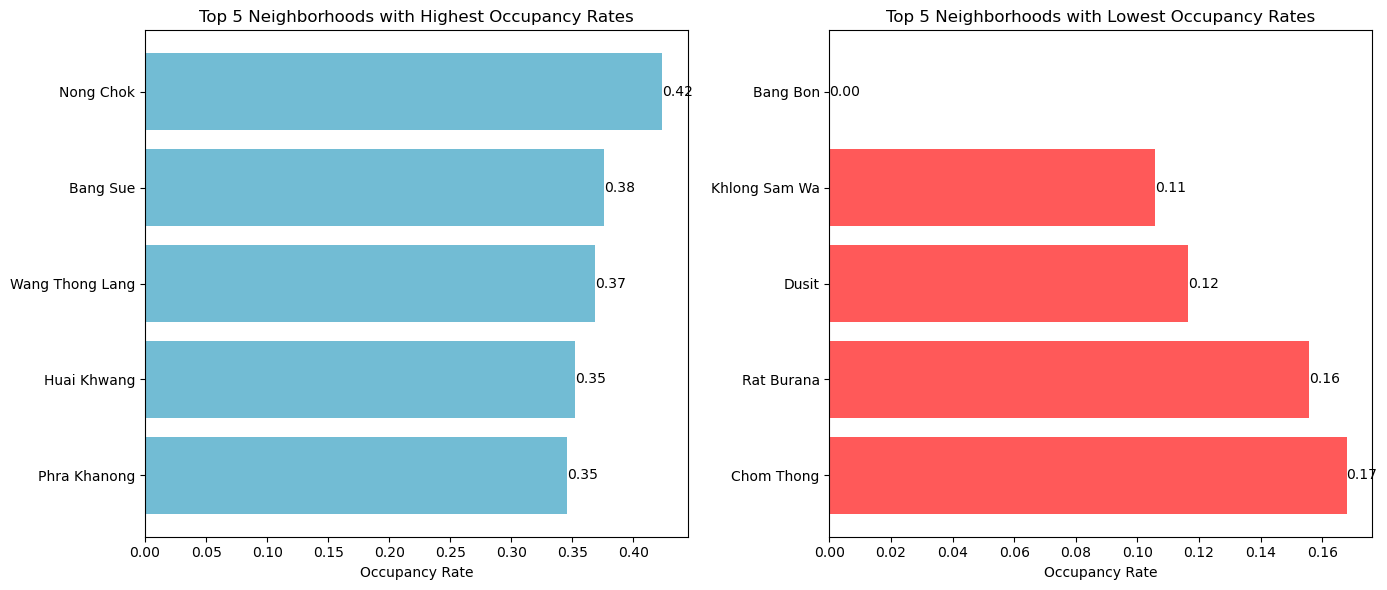

In [79]:
# Create visualizations
plt.figure(figsize=(14, 6))

# Bar chart 'Neighborhoods with Highest Average Occupancy Rates'
plt.subplot(1, 2, 1)
plt.barh(highest_occupancy_neighborhoods['neighbourhood'], highest_occupancy_neighborhoods['occupancy_rate'], color='#72BCD4')
plt.xlabel('Occupancy Rate')
plt.title('Top 5 Neighborhoods with Highest Occupancy Rates')
plt.gca().invert_yaxis()
for index, value in enumerate(highest_occupancy_neighborhoods['occupancy_rate']):
    plt.text(value, index, f'{value:.2f}', va='center')


# # Bar chart 'Neighborhoods with Highest Average Occupancy Rates'
plt.subplot(1, 2, 2)
plt.barh(lowest_occupancy_neighborhoods['neighbourhood'], lowest_occupancy_neighborhoods['occupancy_rate'], color='#FF5959')
plt.xlabel('Occupancy Rate')
plt.title('Top 5 Neighborhoods with Lowest Occupancy Rates')
plt.gca().invert_yaxis()
for index, value in enumerate(lowest_occupancy_neighborhoods['occupancy_rate']):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

**Nong Chok (0.42)** has the highest occupancy rate, indicating a strong demand for private/shared rooms. Investing in more accommodations in Nong Chok could be highly profitable.
**Bang Sue (0.38)** and **Wang Thong Lang (0.37)** follows with a significant occupancy rate, investing in Bang Sue also have strong demand for private/shared rooms.
and for **Huai Khwang (0.35)** and **Phra Khanong (0.35)** neighborhoods are not too different but also have a high-demand for private/shared rooms.


### 3. What are the optimal price ranges to maximize occupancy rates?

In [80]:
# Check the min, max, mean and median price for private/shared room types
private_shared_data['price'].describe().loc[['mean','50%','min','max']]

mean      2888.009069
50%       1200.000000
min        278.000000
max     600700.000000
Name: price, dtype: float64

In [31]:
# Define the price bins
price_bins = pd.cut(private_shared_data['price'], bins=[0, 1000, 2000, 3000, 4000, 5000, 10000, 30000, 70000])

# Calculate mean occupancy rate for different price ranges
occupancy_by_price = private_shared_data.groupby(price_bins)['occupancy_rate'].mean()

# Calculate the total listings for each price range
total_listings_by_price = private_shared_data.groupby(price_bins).size()

# Combine the results into a single DataFrame
occupancy_by_price_data = pd.DataFrame({
    'mean_occupancy_rate': occupancy_by_price,
    'total_listings': total_listings_by_price
})

# Display the DataFrame
occupancy_by_price_data


C:\Users\asus\AppData\Local\Temp\ipykernel_23188\216545974.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  occupancy_by_price = private_shared_data.groupby(price_bins)['occupancy_rate'].mean()
C:\Users\asus\AppData\Local\Temp\ipykernel_23188\216545974.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_listings_by_price = private_shared_data.groupby(price_bins).size()


,mean_occupancy_rate,total_listings
price,,
"(0, 1000]",0.277767,2768
"(1000, 2000]",0.245320,2005
"(2000, 3000]",0.302700,628
"(3000, 4000]",0.223866,308
"(4000, 5000]",0.185407,147
"(5000, 10000]",0.211544,267
"(10000, 30000]",0.253053,118
"(30000, 70000]",0.288029,23


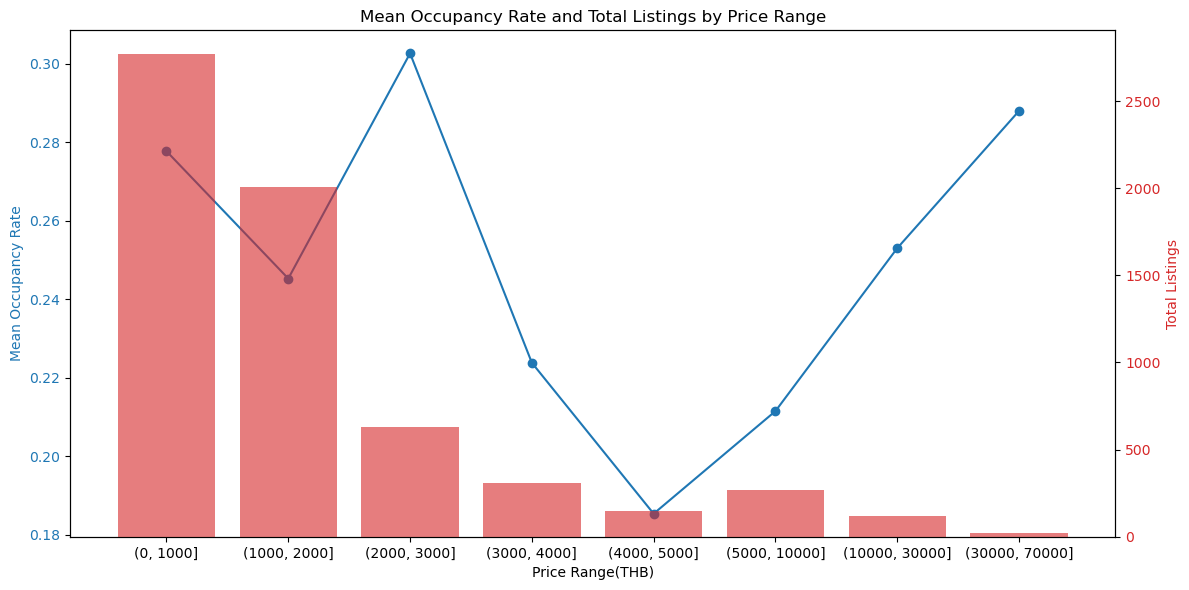

In [37]:
# Plotting the results
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting mean occupancy rate
color = 'tab:blue'
ax1.set_xlabel('Price Range(THB)')
ax1.set_ylabel('Mean Occupancy Rate', color=color)
ax1.plot(occupancy_by_price_data.index.astype(str), occupancy_by_price_data['mean_occupancy_rate'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the total listings
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Total Listings', color=color)
ax2.bar(occupancy_by_price_data.index.astype(str), occupancy_by_price_data['total_listings'], color=color, alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title
plt.title('Mean Occupancy Rate and Total Listings by Price Range')

# Display the plot
fig.tight_layout()
plt.show()

Based on the occupancy rates and competition, the **(2000, 3000) price** range appears to be more favorable. Properties in this range are booked more frequently, and there is less competition, which can lead to higher revenues.


In [77]:
# Check the correlation between mean_occupancy_rate and total_listings
correlation_matrix = occupancy_by_price_data['mean_occupancy_rate'].corr(occupancy_by_price_data['total_listings'])
print("Correlation between mean occupancy rate and total listings:", correlation_matrix)

Correlation between mean occupancy rate and total listings: 0.2892195589656437


correlation coefficient indicates a weak positive relationship between the number of listings in a neighborhood and the average occupancy rate.
The higher number of total listings doesn't affect the occupancy_rate

### 4. Which neighborhoods should be prioritized for rental property investment, based on a balance of affordability, demand, and occupancy potential?

In [40]:
# Now, let's analyze property performance by neighborhood
# Group by neighborhood and calculate average metrics

neighborhood_performance = private_shared_data.groupby('neighbourhood').agg({
    'price': 'mean',
    'minimum_nights': 'mean',
    'number_of_reviews': 'sum',
    'reviews_per_month': 'mean',
    'calculated_host_listings_count': 'mean',
    'availability_365': 'mean'
}).reset_index()

neighborhood_performance.head()


,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Bang Bon,1440.666667,1.000000,0,0.000000,1.000000,365.000000
1,Bang Kapi,4496.664179,9.014925,351,0.130075,3.940299,283.858209
2,Bang Khae,1953.839286,8.196429,43,0.041964,3.410714,282.250000
3,Bang Khen,2869.630769,2.369231,170,0.114615,2.769231,268.784615
4,Bang Kho laen,3745.066667,16.933333,388,0.154889,3.977778,245.644444


In [51]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing the factors
scaler = MinMaxScaler()
neighborhood_performance[['price', 'reviews_per_month', 'number_of_reviews', 'availability_365']] = scaler.fit_transform(
    neighborhood_performance[['price', 'reviews_per_month', 'number_of_reviews', 'availability_365']]
)

# Assign weights to each factor (weights can be adjusted based on importance)
weights = {
    'price': 0.3,
    'reviews_per_month': 0.3,
    'number_of_reviews': 0.2,
    'availability_365': 0.2
}

# Calculate composite score
neighborhood_performance['investment_score'] = (
    neighborhood_performance['price'] * weights['price'] +
    neighborhood_performance['reviews_per_month'] * weights['reviews_per_month'] +
    neighborhood_performance['number_of_reviews'] * weights['number_of_reviews'] +
    (1 - neighborhood_performance['availability_365']) * weights['availability_365']
)

# Rank neighborhoods based on the composite score
top_neighborhoods = neighborhood_performance.sort_values(by='investment_score', ascending=False)

top_10_neighborhoods_investment = top_neighborhoods[['neighbourhood', 'investment_score']].head(10)
top_10_neighborhoods_investment


,neighbourhood,investment_score
33,Phra Nakhon,0.560398
34,Pom Prap Sattru Phai,0.559539
45,Thon buri,0.528362
7,Bang Phlat,0.526879
37,Ratchathewi,0.513499
18,Huai Khwang,0.499425
47,Vadhana,0.482700
29,Parthum Wan,0.465791
22,Khlong Toei,0.461371
31,Phaya Thai,0.428815


In [66]:
# Check the correlation between 
correlation_matrix = neighborhood_performance[['investment_score','price', 'reviews_per_month', 'number_of_reviews', 'availability_365']].corr()
correlation_matrix

,investment_score,price,reviews_per_month,number_of_reviews,availability_365
investment_score,1.000000,0.472596,0.889635,0.796927,-0.458446
price,0.472596,1.000000,0.182361,0.113496,-0.085489
reviews_per_month,0.889635,0.182361,1.000000,0.724419,-0.261213
number_of_reviews,0.796927,0.113496,0.724419,1.000000,-0.146576
availability_365,-0.458446,-0.085489,-0.261213,-0.146576,1.000000


**Investment Score:**

- **Highly Positively Correlated with Reviews Per Month (0.8896):**
This strong positive correlation suggests that higher investment scores are associated with a higher number of reviews per month. Properties with better investment potential tend to receive more frequent feedback.
- **Moderately Positively Correlated with Number of Reviews (0.7969):**
There is also a strong positive correlation with the total number of reviews, indicating that high investment score properties tend to have a greater total number of reviews.
- **Moderately Positively Correlated with Price (0.4726):**
Properties with higher investment scores tend to have higher prices, indicating that investors might be targeting higher-priced properties expecting better returns.
- **Moderately Negatively Correlated with Availability (−0.4584):**
A moderate negative correlation with availability suggests that properties with higher investment scores tend to have lower availability, likely because they are booked more often for occupancy.

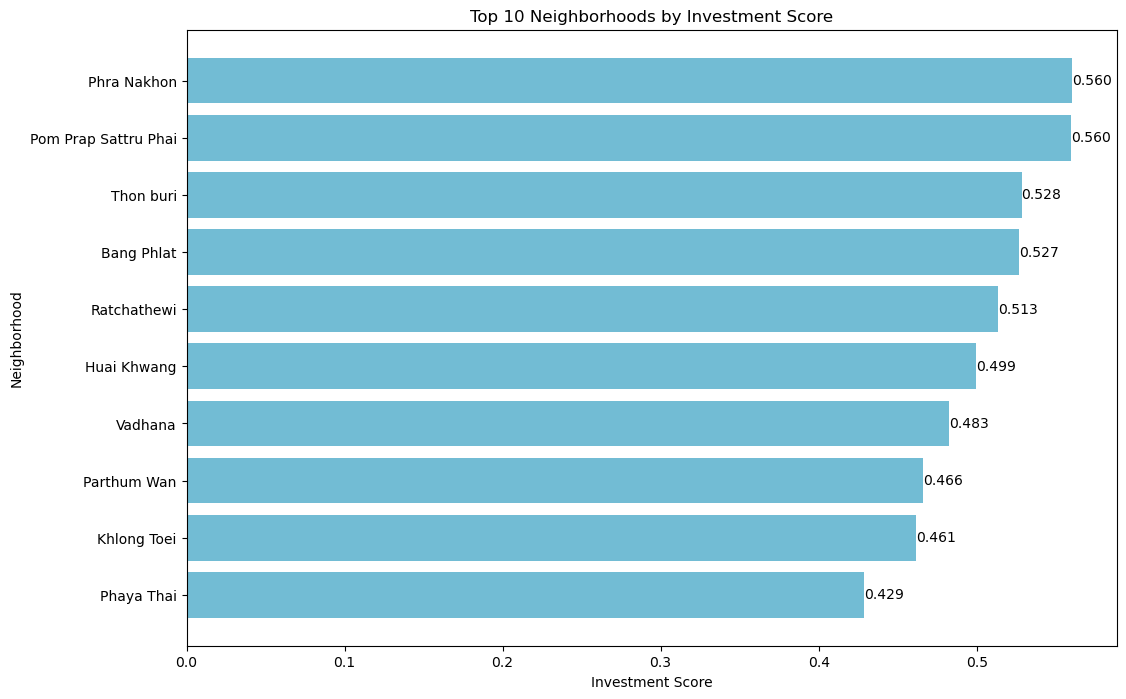

In [52]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_neighborhoods_investment['neighbourhood'], top_10_neighborhoods_investment['investment_score'], color='#72BCD4')
plt.xlabel('Investment Score')
plt.ylabel('Neighborhood')
plt.title('Top 10 Neighborhoods by Investment Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top

# Display values on the bars
for index, value in enumerate(top_10_neighborhoods_investment['investment_score']):
    plt.text(value, index, f'{value:.3f}', va='center')

plt.show()

1. **Phra Nakhon and Pom Prap Sattru Phai (0.560):** These two neighborhoods top the list with the highest investment scores. This suggests they're highly attractive for investments, likely due to factors like high demand, high good reviews, and potential for growth.
2. **Thon Buri (0.528) and Bang Phlat (0.527):** These areas also score well, indicating strong investment potential.
3. **Ratchathewi (0.513):** This neighborhood shows good promise for investors.
4. **Huai Khwang (0.499):** Eventhough slight below of the 0.5 mark, Huai Khwang still a solid choice for investment.

### 5. Which are the top neighborhoods with the highest rental income potential, considering the current occupancy rates and listing availability?

In [63]:
# Calculate estimated annual rental income for each listing
private_shared_data['annual_rental_income'] = private_shared_data['price'] * private_shared_data['occupancy_rate'] * 365

# Group by neighborhood and calculate average annual rental income and listing count
neighborhood_rental_yield = private_shared_data.groupby('neighbourhood').agg({
    'annual_rental_income': 'mean',
    'neighbourhood': 'size'
}).rename(columns={'neighbourhood': 'listing_count'}).reset_index()

# Sort neighborhoods by annual rental income
top_neighborhoods_rental_yield = neighborhood_rental_yield.sort_values(by='annual_rental_income', ascending=False)

# Select top 10 neighborhoods
top_10_neighborhoods_income = top_neighborhoods_rental_yield.head(10)

# Display the top 10 neighborhoods with average annual rental income and listing count
top_10_neighborhoods_income

,neighbourhood,annual_rental_income,listing_count
7,Bang Phlat,1.022500e+06,81
45,Thon buri,9.841168e+05,87
22,Khlong Toei,7.734931e+05,503
4,Bang Kho laen,6.643764e+05,45
3,Bang Khen,5.334696e+05,65
6,Bang Na,4.402185e+05,171
5,Bang Khun thain,3.279382e+05,14
47,Vadhana,3.073652e+05,595
29,Parthum Wan,3.056216e+05,155
18,Huai Khwang,2.771153e+05,324


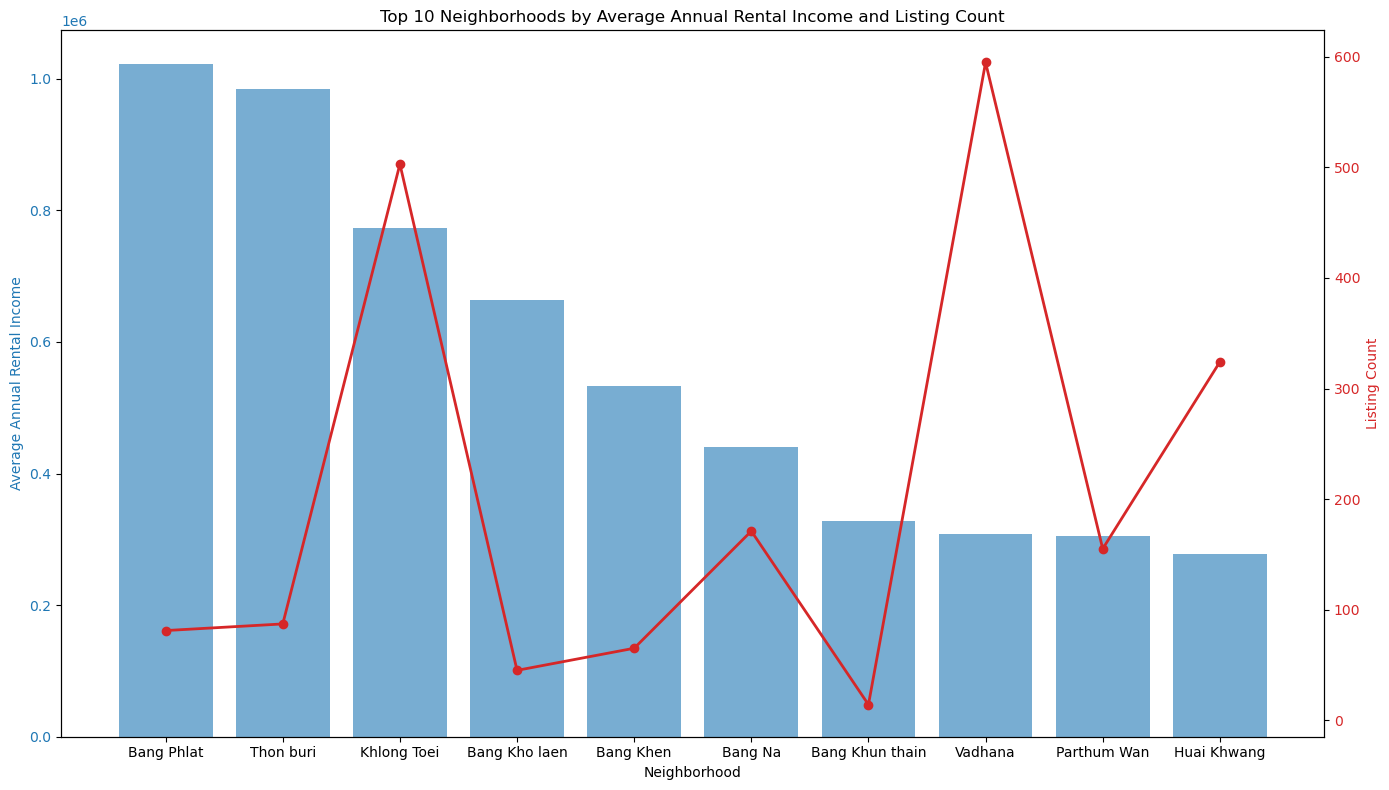

In [67]:
# Plotting the results
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for annual rental income
color = 'tab:blue'
ax1.set_xlabel('Neighborhood')
ax1.set_ylabel('Average Annual Rental Income', color=color)
ax1.bar(top_10_neighborhoods_income['neighbourhood'], top_10_neighborhoods_income['annual_rental_income'], color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot the listing count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Listing Count', color=color)
ax2.plot(top_10_neighborhoods_income['neighbourhood'], top_10_neighborhoods_income['listing_count'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding title
plt.title('Top 10 Neighborhoods by Average Annual Rental Income and Listing Count')

# Display the plot
fig.tight_layout()
plt.show()

**Top Earners:**

**Bang Phlat and Thon Buri:** High rental income (~1 million) with moderate listings, indicating strong demand and profitability.
**Khlong Toei:** High rental income with the highest listing count, suggesting a very active market.

**Moderate Performers:**

**Bang Kho Laem, Bang Khen, and Vadhana:** Moderate rental income and listings, indicating balanced supply and demand.
**Pathum Wan:** Moderate rental income with stable listing count.

**Growth Potential:**

**Bang Na:** Lower rental income but moderate listings, suggesting potential for market growth.
**Huai Khwang:** Lowest rental income with moderate listings, indicating an area for potential improvement.

In [69]:
correlation_matrix = neighborhood_rental_yield[['annual_rental_income', 'listing_count']].corr()
correlation_matrix


,annual_rental_income,listing_count
annual_rental_income,1.000000,0.194086
listing_count,0.194086,1.000000


Correlation Coefficient (0.1941):
Weak positive correlation between annual rental income and listing count.
Slight tendency for rental income to increase with more listings, but the relationship is not strong.

In [78]:
private_shared_data.columns

Index(['index', 'id', 'name', 'host_id', 'host_name', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'occupancy_rate', 'annual_rental_income'],
      dtype='object')

In [86]:
# Join investment_score into private_shared_data
merged_data = pd.merge(private_shared_data, neighborhood_performance[['neighbourhood','investment_score']], on='neighbourhood', how='left')
merged_data.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,occupancy_rate,annual_rental_income,investment_score
0,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316.0,1,0,0.00,2,358,0,0.019178,9212.0,0.310599
1,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800.0,60,0,0.00,1,365,0,0.000000,0.0,0.270974
2,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286.0,7,2,0.03,1,323,1,0.115068,54012.0,0.407807
3,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905.0,1,0,0.00,3,365,0,0.000000,0.0,0.270974
4,6,48736,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558.0,3,1,0.01,1,365,0,0.000000,0.0,0.136063


In [87]:
# Import celan dataset into csv
merged_data.to_csv('cleaned_AirBnb.csv')